<a href="https://colab.research.google.com/github/Nils0217/Business-Analysis-with-Structured-Data/blob/main/Linear_Modeling_Case_Study_(Individual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#import packags
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
from sklearn.tree import plot_tree
from statsmodels.stats.weightstats import ztest
import warnings
from google.colab import files

In [2]:
uploaded= files.upload()

df=pd.read_excel('bike_rentals.xlsx',
                 usecols = range(1, 15))


df.head(n=5)

Saving bike_rentals.xlsx to bike_rentals.xlsx


,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Seasons,Holiday,RENTALS
0,May,Monday,4,18.0,85,0.3,275,15.4,0.00,0.0,0.0,Spring,Yes,202
1,May,Monday,5,18.0,85,0.8,346,15.4,0.00,0.0,0.0,Spring,Yes,180
2,May,Monday,7,18.0,82,0.7,264,14.8,0.11,0.0,0.0,Spring,Yes,645
3,May,Monday,12,22.1,67,2.7,462,15.6,0.81,0.0,0.0,Spring,Yes,1447
4,May,Monday,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Yes,1675


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  1381 non-null   object 
 1   Day of Week            1381 non-null   object 
 2   Hour                   1381 non-null   int64  
 3   Temperature            1381 non-null   float64
 4   Humidity               1381 non-null   int64  
 5   Wind Speed             1381 non-null   float64
 6   Visibility             1381 non-null   int64  
 7   Dew Point Temperature  1381 non-null   float64
 8   UV Index               1381 non-null   float64
 9   Rainfall               1381 non-null   float64
 10  Snowfall               1381 non-null   float64
 11  Seasons                1381 non-null   object 
 12  Holiday                1381 non-null   object 
 13  RENTALS                1381 non-null   int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 151.2+ 

In [4]:
df.describe()

,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,11.570601,17.441130,61.964518,1.586169,1465.161477,9.262056,0.597133,0.177408,0.057350,966.621289
std,6.876044,10.597798,20.207354,0.965501,610.699046,11.452005,0.894999,1.342487,0.397162,731.847302
min,0.000000,-12.300000,0.000000,0.000000,33.000000,-25.200000,0.000000,0.000000,0.000000,5.000000
25%,6.000000,10.400000,46.000000,0.900000,985.000000,1.800000,0.000000,0.000000,0.000000,325.000000
50%,12.000000,20.000000,61.000000,1.400000,1786.000000,11.800000,0.030000,0.000000,0.000000,855.000000
75%,18.000000,25.100000,79.000000,2.100000,2000.000000,19.000000,1.000000,0.000000,0.000000,1375.000000
max,23.000000,38.000000,98.000000,6.900000,2000.000000,26.600000,3.450000,35.000000,7.000000,3734.000000


#Task 1

Executive summary:


**Data cleaning**


In [5]:
#copy the original data to prevent modify the original one
bike= df.copy()

#Holiday considered importent, so convert it from 'Yes', 'No' to interger 1, 2
#for better analysis
bike['Holiday'] = bike['Holiday'].map({'Yes': 1, 'No': 0})

# Lower case and tighten all string data
for col in bike.select_dtypes(include='object').columns:
    bike[col] = bike[col].str.lower().str.strip()

bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  1381 non-null   object 
 1   Day of Week            1381 non-null   object 
 2   Hour                   1381 non-null   int64  
 3   Temperature            1381 non-null   float64
 4   Humidity               1381 non-null   int64  
 5   Wind Speed             1381 non-null   float64
 6   Visibility             1381 non-null   int64  
 7   Dew Point Temperature  1381 non-null   float64
 8   UV Index               1381 non-null   float64
 9   Rainfall               1381 non-null   float64
 10  Snowfall               1381 non-null   float64
 11  Seasons                1381 non-null   object 
 12  Holiday                1381 non-null   int64  
 13  RENTALS                1381 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 151.2+ 

In [6]:
bike.head(n=5)

,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Seasons,Holiday,RENTALS
0,may,monday,4,18.0,85,0.3,275,15.4,0.00,0.0,0.0,spring,1,202
1,may,monday,5,18.0,85,0.8,346,15.4,0.00,0.0,0.0,spring,1,180
2,may,monday,7,18.0,82,0.7,264,14.8,0.11,0.0,0.0,spring,1,645
3,may,monday,12,22.1,67,2.7,462,15.6,0.81,0.0,0.0,spring,1,1447
4,may,monday,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,spring,1,1675


In [7]:
# Create weekday/weekend flag
bike['weekend'] = bike['Day of Week'].isin(['saturday', 'sunday']).astype(int)

bike.head(n=5)

,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Seasons,Holiday,RENTALS,weekend
0,may,monday,4,18.0,85,0.3,275,15.4,0.00,0.0,0.0,spring,1,202,0
1,may,monday,5,18.0,85,0.8,346,15.4,0.00,0.0,0.0,spring,1,180,0
2,may,monday,7,18.0,82,0.7,264,14.8,0.11,0.0,0.0,spring,1,645,0
3,may,monday,12,22.1,67,2.7,462,15.6,0.81,0.0,0.0,spring,1,1447,0
4,may,monday,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,spring,1,1675,0


In [8]:
#Checking extreme data or outlier in column 'Hour'
#Checking point including total rental in certain time and the rental counts

#This shows the total number of bike rentals for each hour of the day across the entire dataset.
hourly_rental_sum = bike.groupby('Hour')['RENTALS'].sum()

#This shows the count of occurrences for each hour in the dataset.
hour_counts = bike['Hour'].value_counts().sort_index()

#show the result
print(f'''hourly_rental_sum: {hourly_rental_sum}, hour_counts:{hour_counts}''')

hourly_rental_sum: Hour
0      47807
1      27089
2      26498
3      16700
4      10312
5      11812
6      21215
7      55257
8      71493
9      52842
10     37610
11     37394
12     69046
13     47612
14     52049
15     75870
16     70657
17     91621
18    120472
19    102403
20     79772
21     84121
22     77481
23     47771
Name: RENTALS, dtype: int64, hour_counts:Hour
0     61
1     45
2     58
3     59
4     59
5     57
6     51
7     60
8     60
9     60
10    61
11    43
12    73
13    53
14    54
15    65
16    56
17    60
18    58
19    61
20    56
21    58
22    61
23    52
Name: count, dtype: int64


In [9]:
#using min and max to check the data range for double check
#if building time series work
hourly_rental_sum_min= hourly_rental_sum.min()
hourly_rental_sum_max= hourly_rental_sum.max()

print(f"Minimum number of rentals: {hourly_rental_sum_min}")
print(f"Maximum number of rentals: {hourly_rental_sum_max}")

Minimum number of rentals: 10312
Maximum number of rentals: 120472


In [10]:
#Group the rental data by hour and compute the hourly averages.
hourly_avg = bike.groupby('Hour')['RENTALS'].mean()

# Distinguish workday which exclude weekend and holiday
# Distinguish weekend including all work off
# Compute in average
workday_avg=bike[(bike['weekend']==0) & (bike['Holiday']==0)].groupby('Hour')['RENTALS'].mean()
weekend_avg= bike[(bike['weekend']==1) | (bike['Holiday']==1)].groupby('Hour')['RENTALS'].mean()

# Combine all descriptive statistics into one DataFrame
comparison_df = pd.DataFrame({
    'Overall': hourly_avg.describe(),
    'Workday': workday_avg.describe(),
    'Weekend': weekend_avg.describe()
}).round()

comparison_df

,Overall,Workday,Weekend
count,24.0,24.0,24.0
mean,958.0,996.0,877.0
std,481.0,496.0,505.0
min,175.0,176.0,170.0
25%,613.0,686.0,484.0
50%,920.0,991.0,791.0
75%,1264.0,1359.0,1295.0
max,2077.0,2018.0,2245.0


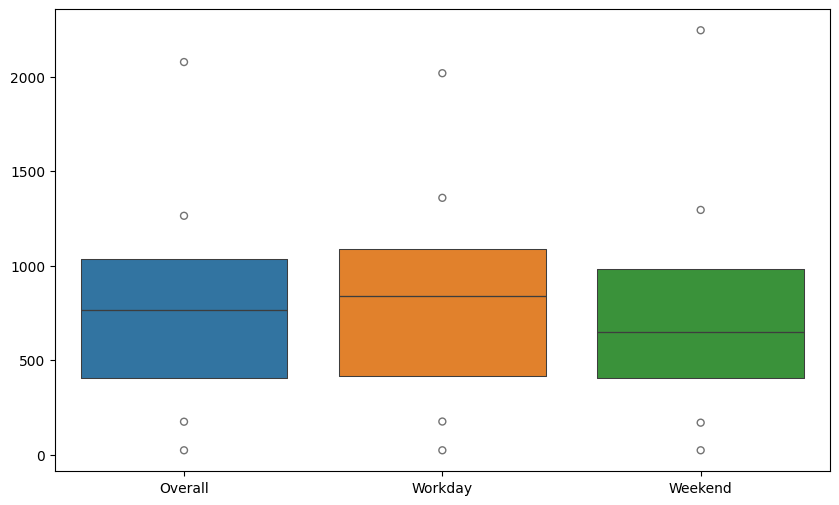

In [11]:
# Using boxplot to visualize the different between total, workday, and weekend
fig,ax = plt.subplots(figsize=(10, 6))

sns.boxenplot(comparison_df)

plt.show()

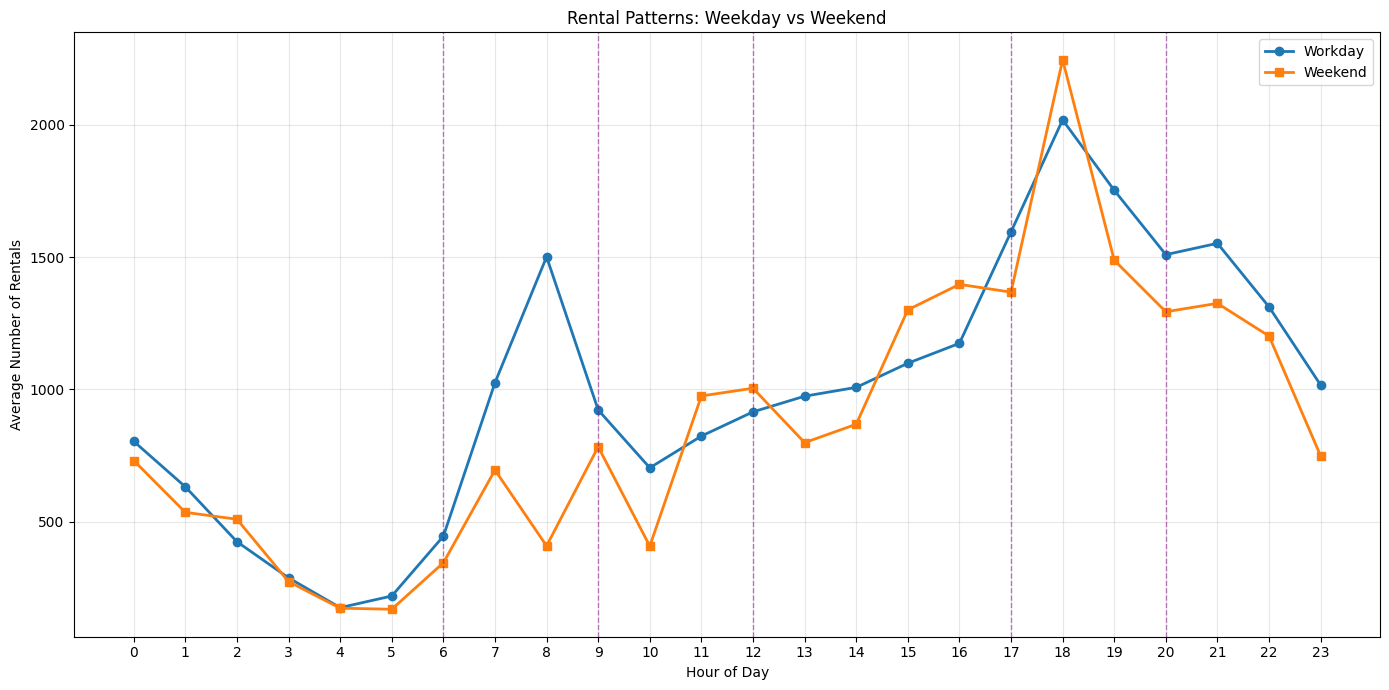

In [12]:
plt.figure(figsize=(14, 7))

# Create the base plot with weekday and weekend lines
plt.plot(workday_avg.index, workday_avg.values, marker='o', label='Workday', linewidth=2)
plt.plot(weekend_avg.index, weekend_avg.values, marker='s', label='Weekend', linewidth=2)



# Add vertical lines at specific time period boundaries
boundary_hours = [6, 9, 12, 17, 20]  # Key transition times
for hour in boundary_hours:
    plt.axvline(x=hour, color='purple', linestyle='--', alpha=0.5, linewidth=1)

plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.title('Rental Patterns: Weekday vs Weekend')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**Rental Patterns: Weekday vs Weekend Analysis**

The line chart compares average bike rental patterns between workdays (blue) and weekends (orange) across all 24 hours of the day. The most striking difference is the **double-peak pattern on workdays**, with clear spikes around 8 AM and 6 PM, corresponding to morning and evening commute times when people travel to and from work (fit Express Limo Inc report). In contrast, the weekend pattern shows a **single broad peak** centered around 5-9 PM, indicating leisurely midday usage rather than commute-driven demand.

Workday rentals are consistently lower during early morning hours (0-6 AM) and late night (after 10 PM), dropping to their lowest levels around 4-5 AM when most people are asleep. The purple dashed vertical lines mark key transition points: 6 AM (night to morning rush), 9 AM (morning rush ends), 12 PM (midday begins), 5 PM (evening rush starts), and 8 PM (evening begins). Weekend rentals show more gradual increases and decreases throughout the day, reflecting flexible leisure schedules without the rigid time constraints of commuting. The gap between the two lines is largest during traditional commute hours (8 AM and 6 PM), where workday demand significantly exceeds weekend demand, while weekend rentals actually surpass workday rentals during midday hours (11 AM - 3 PM) when people have more free time for recreational cycling.

# Using statistic method to verify pure bike 'rental' purpose between commute to work and leisure+exercise

**Method: Seperate leisure+exercise from workday rental to get the pure distinguished rental amount and perform two tail z test**




1. Calculate the average rentals for pure commute hours (6-9 and 19).
2. Calculate the average rentals for pure leisure/exercise hours (all hours excluding 6-9, 15-18, and 19).
3. Calculate the average rentals for overlap hours (15-18).
4. Adjust the overlap rentals by assigning 44% to commute and 56% to leisure/exercise. (Capital Bikeshare member survey, portion split)
5. Combine the adjusted overlap rentals with the pure commute and pure leisure/exercise rentals respectively to get total average commute and leisure/exercise rentals.
6. Compare the total average rentals for commute and leisure/exercise purposes to test the null (H0) and alternative (H1) hypotheses.

### Comparison of Total Average Rentals and Hypothesis Testing

**Null Hypothesis (H0):** The total average rentals for commute purposes are > the total average rentals for leisure+exercise purposes.  
**Alternative Hypothesis (H1):** The total average rentals for commute purposes are <= to the total average rentals for leisure/exercise purposes.

# Process
Perform a One-tailed z-test to compare bike rental demand for commute purposes versus leisure/exercise purposes.

1.  **Extract Pure Commute Rentals**: Create a sample `commute_workday_rentals` by extracting 'RENTALS' values for hours 6-9 and 19, specifically for non-weekend and non-holiday entries (Workday).
2.  **Extract Pure Leisure/Exercise Rentals**: Create a sample `pure_leisure_exercise_rentals` by extracting 'RENTALS' values for all hours excluding 6-9, 15-18, and 19.
3.  **Extract Overlap Rentals**: Create a sample `overlap_rentals` by extracting 'RENTALS' values for hours 15-18.
4.  **Construct Independent Test Samples**:
    *   Create `commute_purpose_sample` by combining the `commute_workday_rentals` with a random 44% subset of `overlap_rentals`.
    *   Create `leisure_exercise_purpose_sample` by combining the `pure_leisure_exercise_rentals` with the remaining 56% subset of `overlap_rentals`, ensuring that the subsets from `overlap_rentals` are mutually exclusive to maintain sample independence.
5.  **Perform One-Tailed Z-Test**: Conduct a two-tailed z-test using `commute_purpose_sample` and `leisure_exercise_purpose_sample` at a 0.05 significance level.
6.  **State Hypotheses and Conclusion**: Clearly state the null (H0) and alternative (H1) hypotheses, report the calculated z-statistic and p-value, and provide a conclusion on whether to reject or fail to reject the null hypothesis.

In [13]:
#Define workday and dayoff
workday = bike[(bike['weekend'] == 0) & (bike['Holiday'] == 0)]
dayoff = bike[(bike['weekend'] == 1) | (bike['Holiday'] == 1)]

#Extract the 'RENTALS' values for pure commute

In [14]:
#Extract the 'RENTALS' values for pure commute hours on workdays
#filter the 'bike' DataFrame based on the specified hours (6-9 and 19)
#ensure that 'weekend' and 'Holiday' columns are both 0.

commute_workday_hours = [6, 7, 8, 9, 19]
commute_workday_rentals = bike[
    (bike['Hour'].isin(commute_workday_hours)) &
    (bike['weekend'] == 0) &
    (bike['Holiday'] == 0)
]['RENTALS']

print(f"Number of commute workday rental entries: {len(commute_workday_rentals)}")
print(f"First 5 entries of commute workday rentals:\n{commute_workday_rentals.head()}")

Number of commute workday rental entries: 206
First 5 entries of commute workday rentals:
7      109
16    1218
19    1780
21     568
30    1894
Name: RENTALS, dtype: int64


#Extract the pure leisure/exercise Rentals

In [46]:
#Extract the 'RENTALS' values for pure leisure/exercise hours from 'workday
all_hours = list(range(24))
excluded_hours = [6, 7, 8, 9, 15, 16, 17, 18, 19]

# This will seperate overlapping bike rental with the purpose of commute to work
pure_leisure_exercise_hours = [hour for hour in all_hours if hour not in excluded_hours]

pure_leisure_exercise_rentals_workday = workday[
    workday['Hour'].isin(pure_leisure_exercise_hours)
]['RENTALS']

print(f"Number of pure leisure/exercise workday rental entries: {len(pure_leisure_exercise_rentals_workday)}")
print(f"First 5 entries of pure leisure/exercise workday rentals:\n{pure_leisure_exercise_rentals_workday.head()}")

Number of pure leisure/exercise workday rental entries: 552
First 5 entries of pure leisure/exercise workday rentals:
8      70
9     347
12    130
13    329
14    312
Name: RENTALS, dtype: int64


## Extract_Overlap_Rentals_Workday



In [16]:
#Extract_Overlap_Rentals_Workday
overlap_hours = [15, 16, 17, 18]
overlap_rentals_workday = workday[
    workday['Hour'].isin(overlap_hours)
]['RENTALS']

print(f"Number of overlap workday rental entries: {len(overlap_rentals_workday)}")
print(f"First 5 entries of overlap workday rentals:\n{overlap_rentals_workday.head()}")

Number of overlap workday rental entries: 162
First 5 entries of overlap workday rentals:
10     154
11     555
27    1966
28    2196
29    2026
Name: RENTALS, dtype: int64


#Seperate overlapping portion to commute and leisure/execise
into 44% for commute and 56% for leisure/exercise (base on the reference)



In [17]:
np.random.seed(42)

# Randomly assign 44% of overlap rentals to commute, rest to leisure
overlap_size = len(overlap_rentals_workday)
commute_mask = np.random.rand(overlap_size) <= 0.44

# Create samples by concatenating
commute_purpose_sample = pd.concat([
    commute_workday_rentals,
    overlap_rentals_workday[commute_mask]
])

#Connect df fragement which belongs to leisure/exercise
leisure_exercise_purpose_sample = pd.concat([
    pure_leisure_exercise_rentals_workday,
    overlap_rentals_workday[~commute_mask],
    dayoff['RENTALS']# Corrected: only concatenate the 'RENTALS' column from dayoff
])

# Calcuate average
commute_purpose_avg=commute_purpose_sample.mean().round()
leisure_exercise_purpose_avg=leisure_exercise_purpose_sample.mean().round()

print(f'Average rentals for commute purpose: {commute_purpose_avg}')
print(f'Average rentals for leisure/exercise purpose:{leisure_exercise_purpose_avg}')

print(f"Commute purpose sample size: {len(commute_purpose_sample)}")
print(f"Leisure/exercise purpose sample size: {len(leisure_exercise_purpose_sample)}")

Average rentals for commute purpose: 1240.0
Average rentals for leisure/exercise purpose:896.0
Commute purpose sample size: 285
Leisure/exercise purpose sample size: 1096


#One-Tail z-test



In [49]:


# Perform the two-tailed z-test
z_stat, p_val = ztest(commute_purpose_sample, leisure_exercise_purpose_sample, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}, P-value: {p_val:.4f}")

# Define significance level
significance_level = 0.05

if p_val < significance_level:
    print("→ Significant difference between commute and leisure/exercise rentals, Reject H0")
else:
    print("→ No significant difference between commute and leisure/exercise rentals, Fail Reject H0")

Z-statistic: 7.2070, P-value: 0.0000
→ Significant difference between commute and leisure/exercise rentals, Reject H0


#Task 2

In [19]:
bike_corr=bike.corr(method = 'pearson',
          numeric_only= True).round(2)

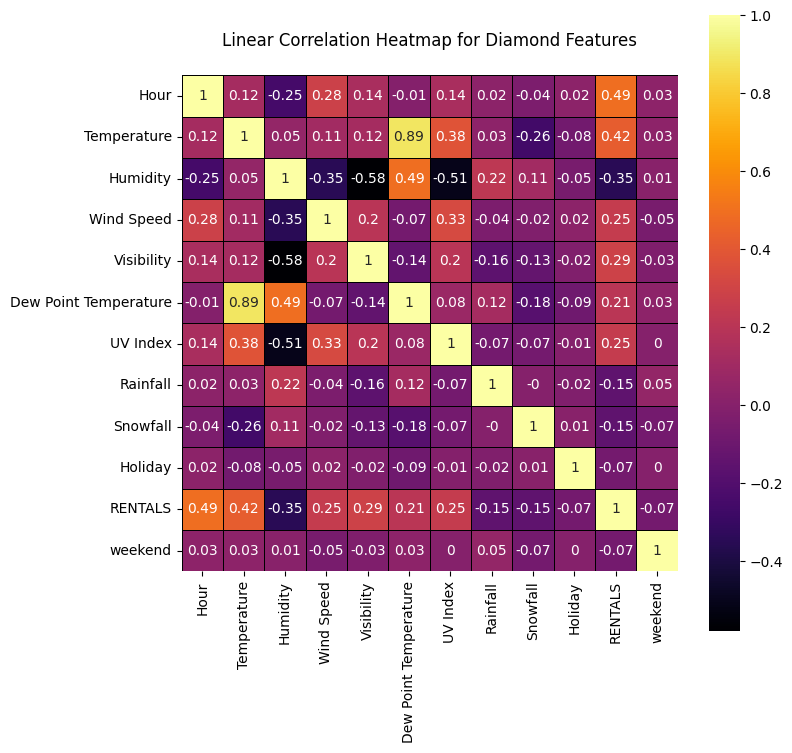

In [20]:
fig, ax = plt.subplots( figsize = (8 , 8) )

sns.heatmap(data       = bike_corr, # the correlation matrix
            cmap       = 'inferno'    , # changing to SPICY colors
            square     = True         , # tightening the layout
            annot      = True         , # should there be numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be?


# title and displaying the plot
plt.title(label = """
Linear Correlation Heatmap for Diamond Features
""")


# showing the finished product
plt.show(block = True)

Seems top 4 factor is Hour, Temperture, visibility, UV

Temperature: 15.6 - 28.1C (Climate Change)
Visibility: Number higher is better
UV: 1-2: Low, 3-7: Moderate to High, 8+: Very High to Extreme

In [21]:
best_weather=bike[(bike['Temperature'] >= 15.6) & (bike['Temperature'] <= 28.1)].corr(method='pearson',
              numeric_only=True).round(decimals=2)

best_weather

,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Holiday,RENTALS,weekend
Hour,1.00,0.12,-0.25,0.28,0.13,-0.17,0.14,0.04,NaN,0.06,0.55,0.03
Temperature,0.12,1.00,-0.07,0.15,0.15,0.47,0.18,-0.06,NaN,-0.12,0.19,-0.07
Humidity,-0.25,-0.07,1.00,-0.34,-0.54,0.83,-0.62,0.25,NaN,-0.11,-0.55,-0.04
Wind Speed,0.28,0.15,-0.34,1.00,0.12,-0.22,0.34,-0.05,NaN,0.03,0.32,-0.07
Visibility,0.13,0.15,-0.54,0.12,1.00,-0.37,0.21,-0.20,NaN,-0.01,0.32,0.03
Dew Point Temperature,-0.17,0.47,0.83,-0.22,-0.37,1.00,-0.48,0.16,NaN,-0.16,-0.35,-0.09
UV Index,0.14,0.18,-0.62,0.34,0.21,-0.48,1.00,-0.11,NaN,0.04,0.23,0.01
Rainfall,0.04,-0.06,0.25,-0.05,-0.20,0.16,-0.11,1.00,NaN,-0.03,-0.22,0.06
Snowfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,0.06,-0.12,-0.11,0.03,-0.01,-0.16,0.04,-0.03,NaN,1.00,0.03,-0.04


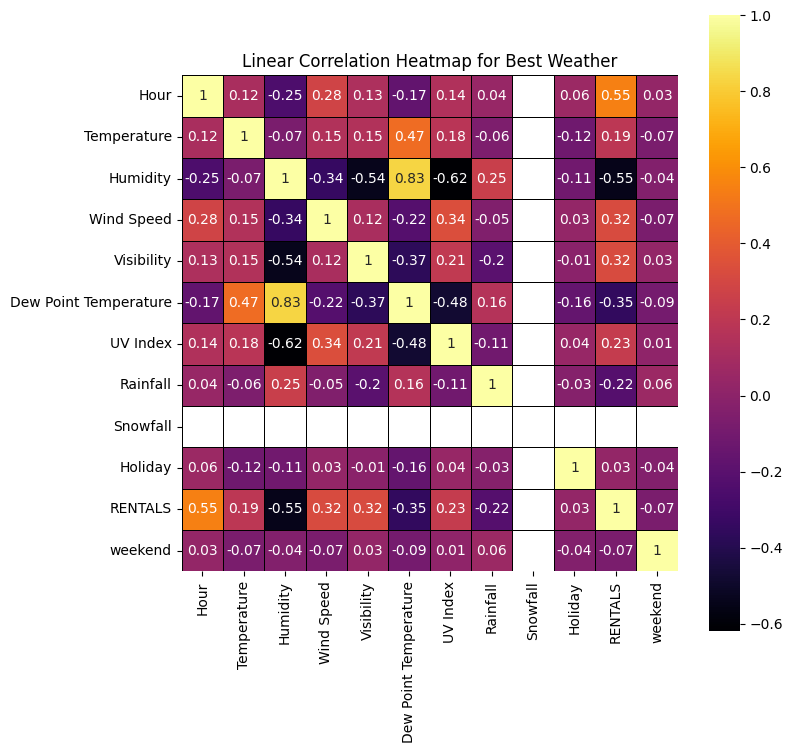

In [22]:
fig,ax= plt.subplots(figsize=(8,8))

sns.heatmap(data= best_weather,
             cmap='inferno',
             square=True,
             annot=True,
             linecolor='black',
             linewidths=0.5
)

plt.title(label='Linear Correlation Heatmap for Best Weather')

plt.show(block=True)

Under ideal temperature wind speed and visibility become most importent.

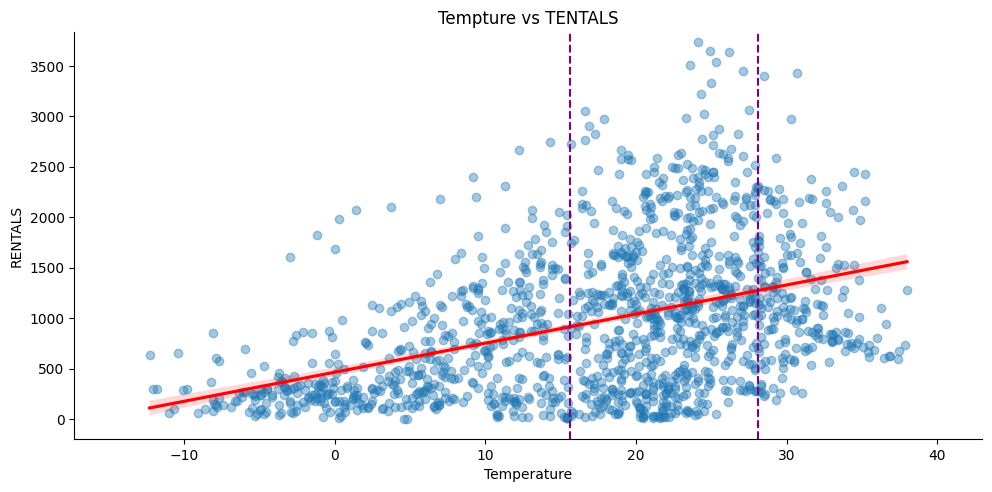

In [23]:
# instantiating a scatter plot for carat and price
sns.lmplot(x          = 'Temperature' , # x-axis feature
           y          = 'RENTALS' , # y-axis feature
           hue        = None    , # categorical data for subsets
           scatter    = True    , # renders a scatter plot
           fit_reg    = True   , # renders a regression line
           aspect     = 2       , # aspect ratio for plot
           data       = bike,
           scatter_kws={'alpha': 0.4},
           line_kws={'color': 'red'}
           )



# vertical reference lines
plt.axvline(x=15.6, color='purple', linestyle='--')
plt.axvline(x=28.1, color='purple', linestyle='--')


# formatting and displaying the plot
plt.title       (label  = 'Tempture vs TENTALS')
plt.xlabel      (xlabel = 'Temperature'          )
plt.ylabel      (ylabel = 'RENTALS'           )
plt.xlim (bike['Temperature'].min()-5, bike['Temperature'].max()+5)
plt.ylim (bike['RENTALS'].min()-200,bike['RENTALS'].max()+100)
plt.tight_layout(pad    = 1.0                     )
plt.show        (block  = True                    )

Task 3

In [24]:
x_all=bike.drop(columns=['RENTALS'], axis=1)
x_base=bike[['Hour',	'Temperature',	'Humidity',	'Wind Speed',	'Visibility',	'Dew Point Temperature',	'UV Index',	'Rainfall',	'Snowfall','Holiday','weekend']]

y_origin= bike['RENTALS']

liner

In [25]:
# x-data
x_data = x_base

# y_data
y_data = y_origin

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.35,
                                                    random_state = 42 )

In [26]:
print(f"""
Data Shapes
-----------
x_train: {x_train.shape}
y_train: {y_train.shape}

x_test:  {x_test.shape}
y_test:  {y_test.shape}
""")


Data Shapes
-----------
x_train: (897, 11)
y_train: (897,)

x_test:  (484, 11)
y_test:  (484,)



In [27]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.4859
Testing Score  : 0.4713
Train-Test Gap : 0.0146


In [28]:
## Residual Analysis ##

# organizing residuals
model_residuals = {
    "True"            : y_test,
    "Predicted"       : model_pred.round(decimals = 0).astype(dtype = int)
}


# converting residuals into df
resid_df = pd.DataFrame(data = model_residuals)


# checking results
resid_df.head(n = 5)

,True,Predicted
309,2584,974
741,1161,1175
265,2623,1615
823,1830,1423
778,540,800


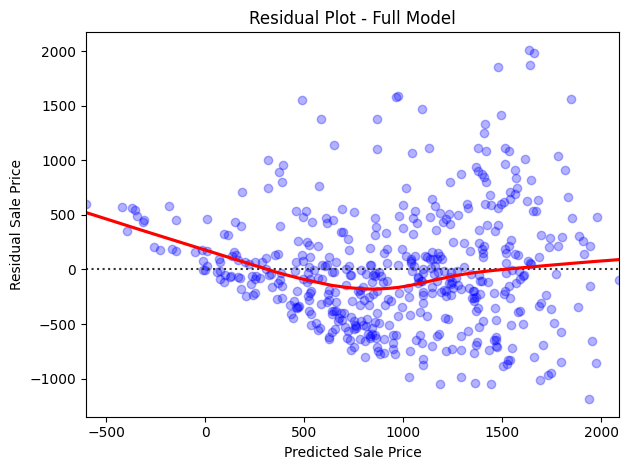

In [29]:
# developing a residual plot
sns.residplot(data        = resid_df,
              x           = 'Predicted', #can change
              y           = 'True',      #can change
              lowess      = True,
              color       = 'blue',
              scatter_kws = {'alpha': 0.3},   # data point transparency
              line_kws    = {'color': 'red'}) # line color


# title and axis labels
plt.title(label   = "Residual Plot - Full Model")
plt.xlabel(xlabel = "Predicted Sale Price")
plt.ylabel(ylabel = "Residual Sale Price")


# layout and rendering visual
plt.tight_layout()
plt.show()

Decision tree

In [30]:
x_data= x_base
y_data= y_origin

In [31]:
x_train,x_test,y_train,y_test= train_test_split(
    x_data,
    y_data,
    test_size=0.35,
    random_state=42
)

In [32]:
print(f'''
x_test:{x_test.shape},
y_test:{y_test.shape},
x_train:{x_train.shape},
y_train:{y_train.shape}
''')


x_test:(484, 11),
y_test:(484,),
x_train:(897, 11),
y_train:(897,)



In [33]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree regressor.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Fri

In [34]:
model_name='Unpruned Regression Tree'

# INSTANTIATING a model object
model=DecisionTreeRegressor(max_depth=6,
                            min_samples_leaf=60,
                            random_state=42
                              )

# FITTING to the training data
model_fit= model.fit(x_train,y_train)

# PREDICTING on new data
model_pred= model.predict(x_test)


# SCORING the results (R-square)
model_train_score = model.score(x_train, y_train)
model_test_score  = model.score(x_test, y_test)
model_gap         = abs(model_train_score - model_test_score)


# displaying results
print('Training Score :', round(model_train_score, ndigits = 4))
print('Testing Score  :', round(model_test_score, ndigits = 4))
print('Train-Test Gap :', round(model_gap, ndigits = 4))

Training Score : 0.6155
Testing Score  : 0.5766
Train-Test Gap : 0.0388


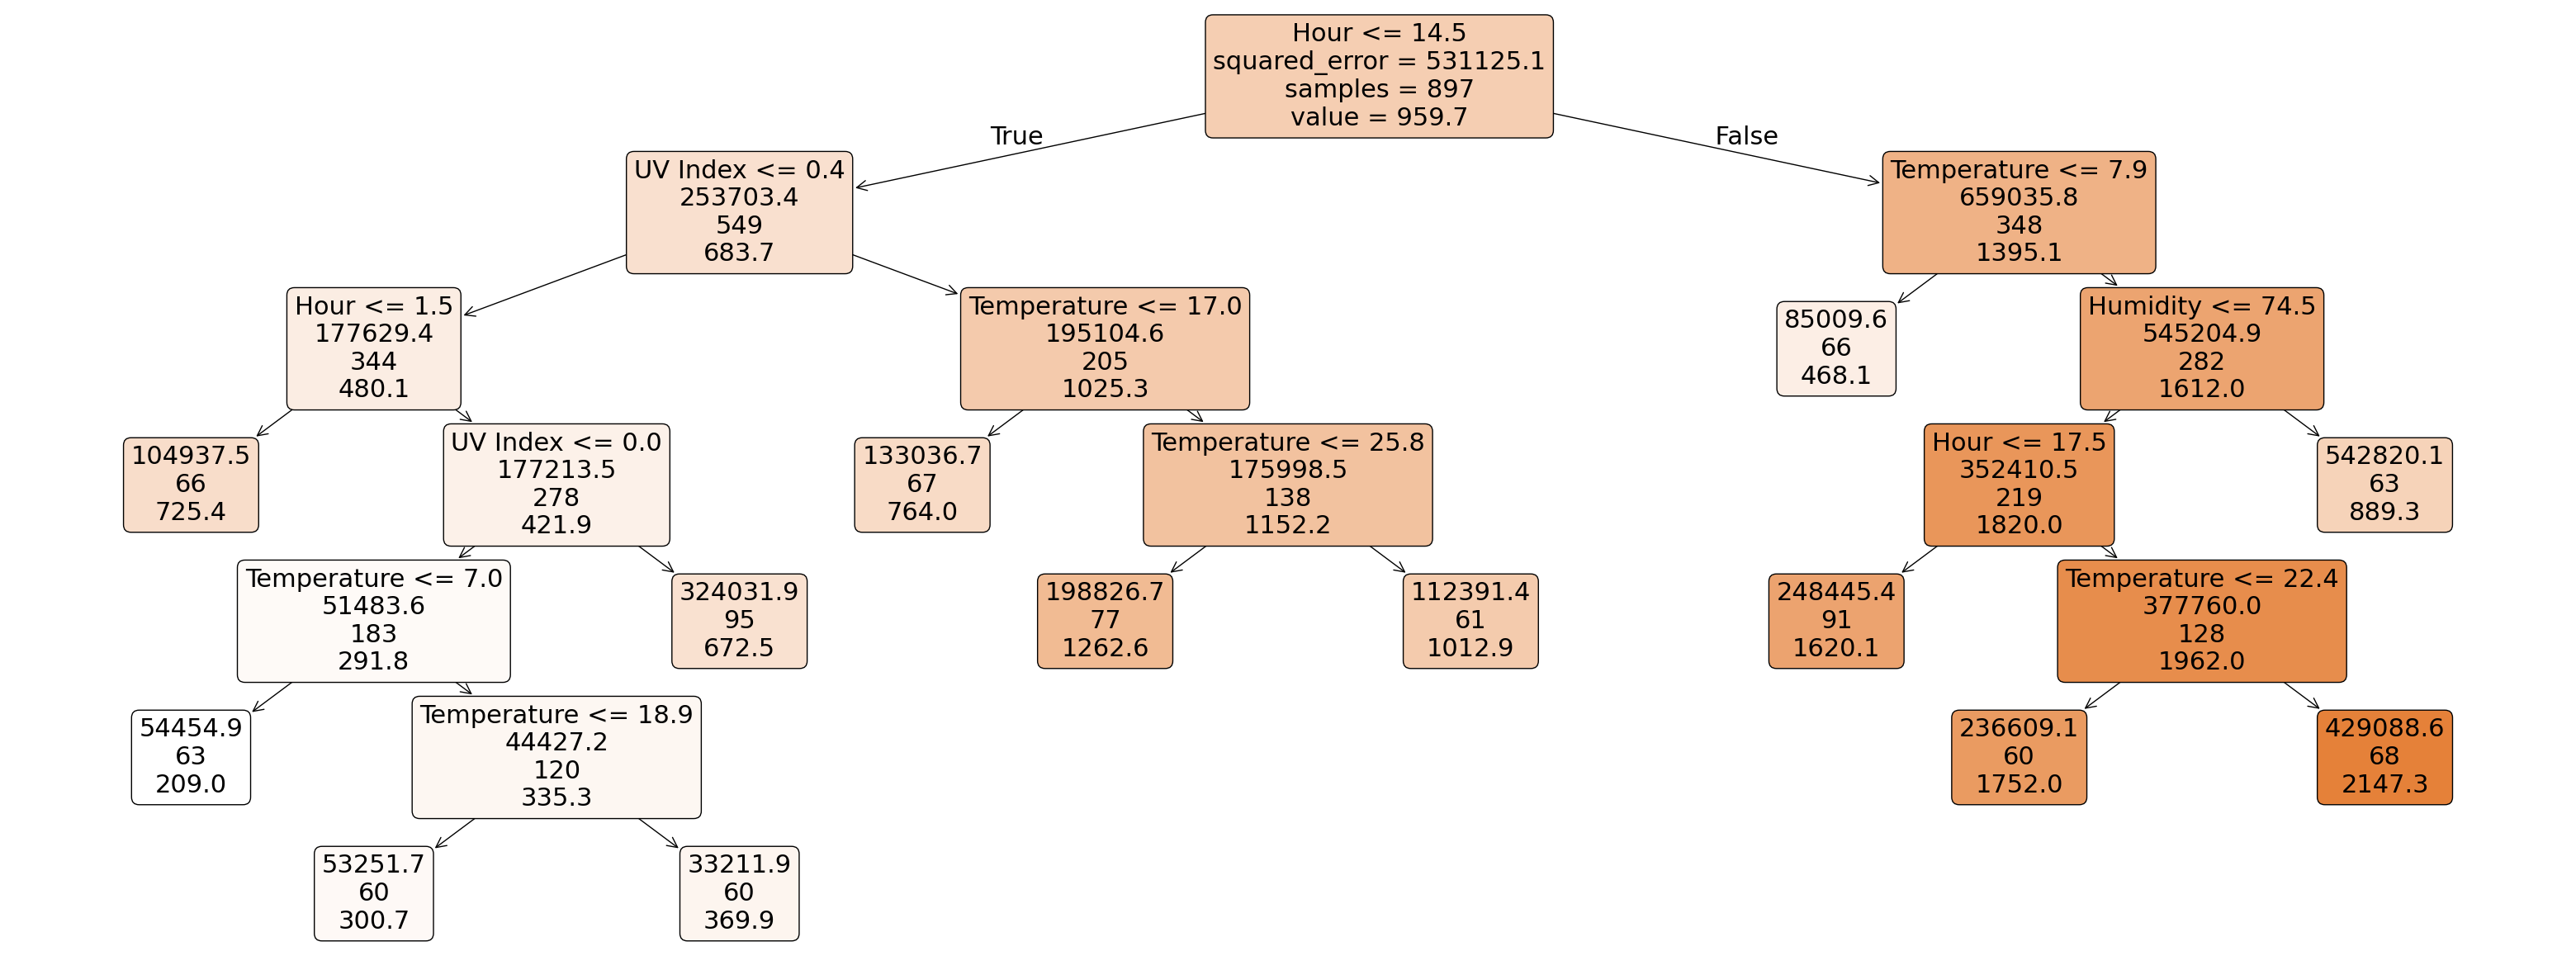

In [35]:
# setting figure size
plt.figure(figsize=(40, 15)) # adjust this as needed


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True,
          rounded       = True,
          fontsize      = 22,
          label         = 'root', # optional asthetics
          precision     = 1,
          )


# rendering the plot
plt.show()

In [36]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.

    PARAMETERS
    ----------
    model  : CART model
    train  : training data (x-side)
    export : whether or not to export as a .png image, default False
    """

    # declaring the number
    n_features = x_train.shape[1]

    # setting plot window
    fig, ax = plt.subplots(figsize=(10, 8))

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

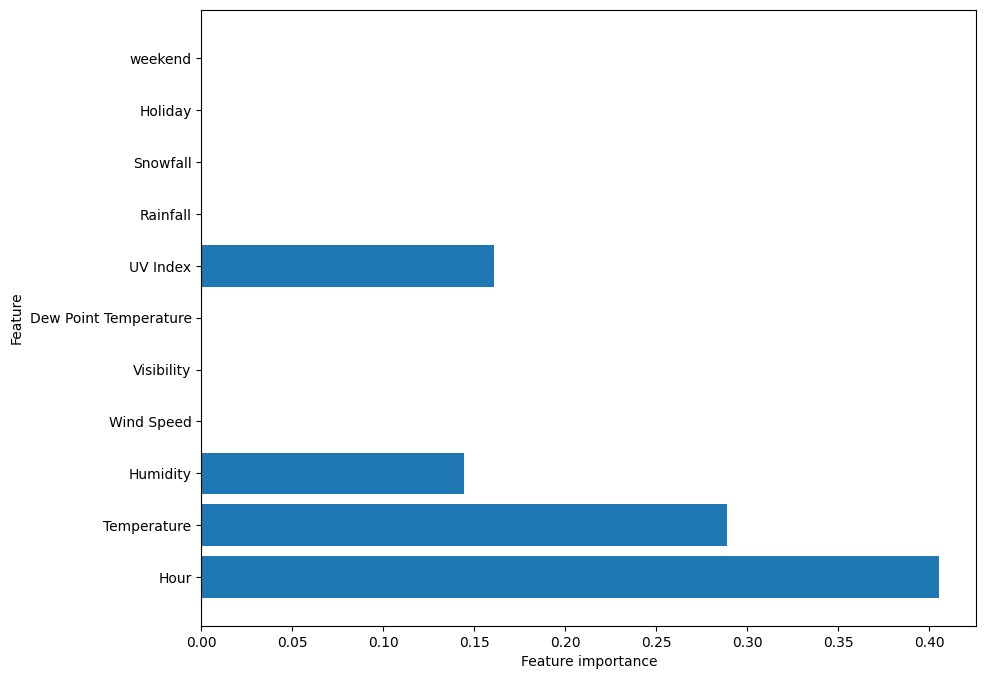

In [37]:
plot_feature_importances(model,
                         train = x_train,
                         export = False)

Express Limo Inc. (n.d.). When is rush hour in Boston? Our traffic guide. https://expresslimoinc.com/when-is-rush-hour-in-boston-our-traffic-guide/

Los Angeles County Metropolitan Transportation Authority. (2011). 2011 Capital Bikeshare member survey. https://libraryarchives.metro.net/DPGTL/harvested/2011-Capital-bikeshare-member-survey.pdf

Big Momma’s Bicycles. (2022, January). The best weather conditions to ride a bicycle. https://bigmommasbicycles.com/2022/01/the-best-weather-conditions-to-ride-a-bicycle/

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 准备数据
X = x_base  # 或者用 x_all
y = y_origin


# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [39]:
# 训练 Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,        # 100棵树
    max_depth=10,            # 最大深度
    min_samples_leaf=42,     # 叶子节点最小样本
    min_samples_split=100,    # 分割最小样本
    max_features='sqrt',     # 每次分割考虑的特征数
    random_state=42,
    n_jobs=-1                # 使用所有CPU核心
)

rf_model.fit(X_train, y_train)

# 评估
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
gap = abs(train_score - test_score)

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("="*60)
print("RANDOM FOREST RESULTS")
print("="*60)
print(f"Training R²:   {train_score:.4f}")
print(f"Testing R²:    {test_score:.4f}")
print(f"Train-Test Gap: {gap:.4f}")
print(f"RMSE:          {rmse:.2f}")

RANDOM FOREST RESULTS
Training R²:   0.6154
Testing R²:    0.5652
Train-Test Gap: 0.0503
RMSE:          485.71


In [40]:
# 特征重要性

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)





Feature Importance:
                  Feature  Importance
0                    Hour    0.353519
1             Temperature    0.177779
2                Humidity    0.137864
6                UV Index    0.115179
5   Dew Point Temperature    0.086668
3              Wind Speed    0.058245
4              Visibility    0.039987
7                Rainfall    0.028172
10                weekend    0.002588
8                Snowfall    0.000000
9                 Holiday    0.000000


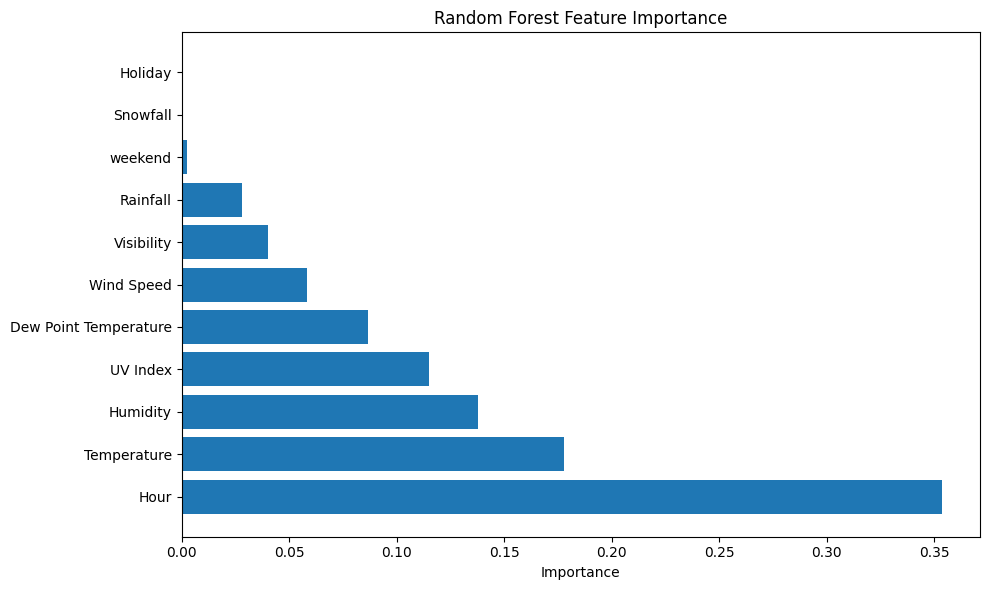

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()